In [152]:
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import feature_engineering
import numpy as np

# Loading Up Data

In [71]:
news_and_finance_data = pd.read_csv('data/news_and_finance_date.csv')
news_and_finance_data = news_and_finance_data.fillna(0)
y_data = news_and_finance_data['MONTHLY_RETURN']
yf1_data = news_and_finance_data['MONTHLY_RETURN_F1']
to_drop = ['security', 'date_x', 'date_y', 'month', 'MONTHLY_RETURN', 'MONTHLY_RETURN_F1', 'RP_ENTITY_ID', 'RP_STORY_EVENT_INDEX', ]
x_data = news_and_finance_data.drop(to_drop, axis=1)
for column in x_data.columns:
    x_data[column] = feature_engineering.data_normalization(x_data, column)

In [72]:
x_data

,LTM_REVENUE,LTM_EPS,LTM_OPERATING_INCOME,LTM_OPERATING_MARGIN,EV,NTM_PE,NTM_REVENUE,NTM_EPS,NTM_OPERATING_MARGIN,NTM_EV_EBITDA,...,NORMAL_RELEVANCE,NORMAL_EVENT_SENTIMENT_SCORE,NORMAL_EVENT_RELEVANCE,NORMAL_EVENT_SIMILARITY_DAYS,ENCODED_TOPIC,ENCODED_GROUP,ENCODED_TYPE,ENCODED_FACT_LEVEL,ENCODED_NEWS_TYPE,ENCODED_CATEGORY
0,-0.349826,-0.406300,-0.533473,-0.875438,-0.361772,0.198435,-0.296221,-0.386191,0.0,0.194241,...,-0.033981,-0.040016,-0.041283,-0.108656,0.135116,0.056121,-0.022631,-0.358892,0.294990,-0.116771
1,-0.349826,-0.406300,-0.533473,-0.875438,-0.361772,0.284612,-0.295957,-0.385559,0.0,0.296214,...,-0.033981,-0.040016,-0.041283,-0.108656,0.135116,0.056121,-0.022631,-0.358892,0.294990,-0.116771
2,-0.333511,-0.401046,-0.520964,-0.868992,-0.269748,0.418224,-0.294799,-0.385980,0.0,0.461465,...,-0.033981,-0.040016,-0.041283,-0.108656,0.135116,0.056121,-0.022631,-0.358892,0.294990,-0.116771
3,-0.333511,-0.401046,-0.520964,-0.868992,-0.269748,0.382380,-0.271021,-0.366532,0.0,0.403480,...,-0.033981,-0.040016,-0.041283,-0.108656,0.135116,0.056121,-0.022631,-0.358892,0.294990,-0.116771
4,-0.333511,-0.401046,-0.520964,-0.868992,-0.269748,0.346410,-0.270402,-0.366181,0.0,0.342496,...,-0.033981,-0.040016,-0.041283,-0.108656,0.135116,0.056121,-0.022631,-0.358892,0.294990,-0.116771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,-0.645667,-0.288345,-0.333594,1.541500,-0.199113,0.162245,-0.620119,-0.284174,0.0,0.449939,...,-0.033981,-0.040016,-0.041283,-0.108656,0.135116,0.056121,-0.022631,-0.358892,0.294990,-0.116771
3536,-0.643309,-0.279773,-0.336042,1.470019,-0.190385,0.119849,-0.620005,-0.283613,0.0,0.397541,...,-0.033981,-0.040016,-0.041283,-0.108656,0.135116,0.056121,-0.022631,-0.358892,0.294990,-0.116771
3537,-0.643309,-0.279773,-0.336042,1.470019,-0.190385,0.080919,-0.617242,-0.265288,0.0,0.375782,...,0.891183,4.237260,1.723057,0.246883,0.041571,-2.276877,1.024424,3.043979,-1.496509,-0.941538
3538,-0.643309,-0.280252,-0.336042,1.470019,-0.190385,0.183537,-0.617337,-0.265077,0.0,0.467875,...,0.891183,3.423046,-0.477970,-1.317770,-0.571958,7.285802,6.085864,2.880228,-3.979897,-0.489622


# Trying some classifiers

In [113]:
classifiers = [
    ('Decision Tree', DecisionTreeRegressor()),
    ('SVM', SVR()),
    ('Linear Regression', LinearRegression()),
    ('Stochastic Gradient Descent', SGDRegressor())
    ]

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [143]:
for classifier in classifiers:
    clf_name, clf = classifier
    pipe = make_pipeline(clf)
    pipe.fit(x_train, y_train)
    prediction = pipe.predict(x_test)
    mse = np.square(np.subtract(prediction,y_test)).mean()
    print('Classifer:', clf_name)
    print('Mean Square Error:', mse)

Classifer: Decision Tree
Mean Square Error: 0.011161585108731902
Classifer: SVM
Mean Square Error: 0.0064316422220598085
Classifer: Linear Regression
Mean Square Error: 0.006271236417192644
Classifer: Stochastic Gradient Descent
Mean Square Error: 109932.92967816329


Seems like the data is best regressed by the Decision Tree, SVM, and Linear Regression. I will start by analyzing Linear Regression and seeing if there are any regression parameters we can hypertune.

# Linear Regression Hypertuning

## Using LASSO and Ridge Regresssion

Classifer: LASSO
Hyperparamater: Alpha =  0.001
Mean Square Error: 0.006538757367571319
Classifer: LASSO
Hyperparamater: Alpha =  0.001
Mean Square Error: 0.006538757367571319
Classifer: LASSO
Hyperparamater: Alpha =  0.05
Mean Square Error: 0.006551737953797192
Classifer: LASSO
Hyperparamater: Alpha =  0.1
Mean Square Error: 0.006551737953797192
Classifer: LASSO
Hyperparamater: Alpha =  1.0
Mean Square Error: 0.006551737953797192
Classifer: LASSO
Hyperparamater: Alpha =  0.25
Mean Square Error: 0.006551737953797192
Classifer: LASSO
Hyperparamater: Alpha =  0.5
Mean Square Error: 0.006551737953797192
Classifer: LASSO
Hyperparamater: Alpha =  1
Mean Square Error: 0.006551737953797192
Classifer: LASSO
Hyperparamater: Alpha =  2
Mean Square Error: 0.006551737953797192


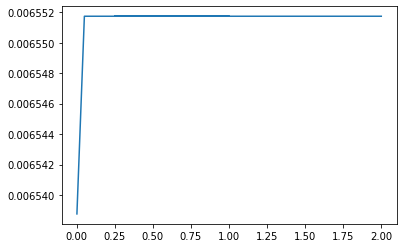

In [150]:
from sklearn.linear_model import Lasso, Ridge
c_values = [10e-4, 10e-4, 5e-2, 10e-2, 10e-1, .25, .5, 1, 2]
lasso_mses= []
for c in c_values:
    lasso_pipe = make_pipeline(Lasso(alpha=c))
    lasso_pipe.fit(x_train, y_train)
    lasso_prediction = lasso_pipe.predict(x_test)
    lasso_mse = np.square(np.subtract(lasso_prediction,y_test)).mean()
    lasso_mses.append(lasso_mse)
    print('Classifer: LASSO')
    print('Hyperparamater: Alpha = ', c)
    print('Mean Square Error:', lasso_mse)
plt.plot(c_values, lasso_mses)

Classifer: Ridge
Hyperparamater: Alpha =  0.001
Mean Square Error: 0.006267061188672588
Classifer: Ridge
Hyperparamater: Alpha =  0.001
Mean Square Error: 0.006267061188672588
Classifer: Ridge
Hyperparamater: Alpha =  0.05
Mean Square Error: 0.006268821550031667
Classifer: Ridge
Hyperparamater: Alpha =  0.1
Mean Square Error: 0.006270580345004902
Classifer: Ridge
Hyperparamater: Alpha =  1.0
Mean Square Error: 0.0062970172580889576
Classifer: Ridge
Hyperparamater: Alpha =  0.25
Mean Square Error: 0.006275642327256896
Classifer: Ridge
Hyperparamater: Alpha =  0.5
Mean Square Error: 0.006283433333254693
Classifer: Ridge
Hyperparamater: Alpha =  1
Mean Square Error: 0.0062970172580889576
Classifer: Ridge
Hyperparamater: Alpha =  2
Mean Square Error: 0.006318469173681625


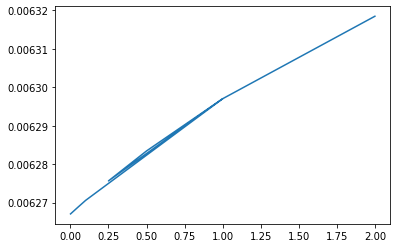

In [151]:
ridge_mses= []
for c in c_values:
    ridge_pipe = make_pipeline(Ridge(alpha=c))
    ridge_pipe.fit(x_train, y_train)
    ridge_prediction = ridge_pipe.predict(x_test)
    ridge_mse = np.square(np.subtract(ridge_prediction,y_test)).mean()
    ridge_mses.append(ridge_mse)
    print('Classifer: Ridge')
    print('Hyperparamater: Alpha = ', c)
    print('Mean Square Error:', ridge_mse)
plt.plot(c_values, ridge_mses)

So far, it looks like Ridge(c=.001) is the best model.

In [172]:
scores = cross_val_score(Ridge(alpha=.001), x_data, y_data, cv=5, scoring='neg_mean_squared_error')
for i, score in enumerate(scores):
    print('Crossfold ', i, ':', -1*score)
print('Average Error:', -1*np.mean(scores))
print('Standard Deviation of Error:', np.std(scores))

Crossfold  0 : 0.03194182369637138
Crossfold  1 : 0.013745324168469863
Crossfold  2 : 0.01985025821307167
Crossfold  3 : 0.00955448186756277
Crossfold  4 : 0.0038319629675104216
Average Error: 0.015784770182597222
Standard Deviation of Error: 0.009627294573522913


# Support Vector Regression

In [170]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_mses= []
for ker in kernels:
    svr = make_pipeline(SVR(kernel=ker))
    svr.fit(x_train, y_train)
    svr_prediction = svr.predict(x_test)
    kernel_mse = np.square(np.subtract(svr_prediction,y_test)).mean()
    kernel_mses.append(kernel_mse)
    print('Classifer: SVR')
    print('Hyperparamater: Kernel = ', ker)
    print('Mean Square Error:', kernel_mse)

Classifer: SVR
Hyperparamater: Kernel =  linear
Mean Square Error: 0.006232345425297206
Classifer: SVR
Hyperparamater: Kernel =  poly
Mean Square Error: 0.007276498157367512
Classifer: SVR
Hyperparamater: Kernel =  rbf
Mean Square Error: 0.0064316422220598085
Classifer: SVR
Hyperparamater: Kernel =  sigmoid
Mean Square Error: 171.53897009724804


In [173]:
scores = cross_val_score(SVR(kernel='linear'), x_data, y_data, cv=5, scoring='neg_mean_squared_error')
for i, score in enumerate(scores):
    print('Crossfold ', i, ':', -1*score)
print('Average Error:', -1*np.mean(scores))
print('Standard Deviation of Error:', np.std(scores))

Crossfold  0 : 0.03345552868911611
Crossfold  1 : 0.014123135567536088
Crossfold  2 : 0.013076326602474432
Crossfold  3 : 0.0071469607957855875
Crossfold  4 : 0.004035576786598319
Average Error: 0.014367505688302107
Standard Deviation of Error: 0.010246604370638254


### Results: In a pure train/test split, we see that Linear Kernel SVR is the best model, but in the case of cross validation, we see that Ridge Regression with C=.001 is the best model. Because I believe that the CV split is a more robust evaluation, I will be using the Ridge Regression with C=.001 as my model to predict monthly returns.

# Evaluating F1

In [174]:
x_train, x_test, yf_train, yf_test = train_test_split(x_data, yf1_data, test_size=0.2)

In [177]:
for classifier in classifiers:
    clf_name, clf = classifier
    pipe = make_pipeline(clf)
    pipe.fit(x_train, yf_train)
    prediction = pipe.predict(x_test)
    mse = np.square(np.subtract(prediction,yf_test)).mean()
    print('Classifer:', clf_name)
    print('Mean Square Error:', mse)

Classifer: Decision Tree
Mean Square Error: 0.012792693223972348
Classifer: SVM
Mean Square Error: 0.007121857324978603
Classifer: Linear Regression
Mean Square Error: 0.008035064643954887
Classifer: Stochastic Gradient Descent
Mean Square Error: 0.02604733515578077


We see similar results for the F1 Monthly Returns (except for SGD) and I theorize that the model willl be very similar to what we saw for the non F1 returns.

Classifer: LASSO
Hyperparamater: Alpha =  0.001
Mean Square Error: 0.007429346302269495
Classifer: LASSO
Hyperparamater: Alpha =  0.001
Mean Square Error: 0.007429346302269495
Classifer: LASSO
Hyperparamater: Alpha =  0.05
Mean Square Error: 0.006722647669434859
Classifer: LASSO
Hyperparamater: Alpha =  0.1
Mean Square Error: 0.006722647669434859
Classifer: LASSO
Hyperparamater: Alpha =  1.0
Mean Square Error: 0.006722647669434859
Classifer: LASSO
Hyperparamater: Alpha =  0.25
Mean Square Error: 0.006722647669434859
Classifer: LASSO
Hyperparamater: Alpha =  0.5
Mean Square Error: 0.006722647669434859
Classifer: LASSO
Hyperparamater: Alpha =  1
Mean Square Error: 0.006722647669434859
Classifer: LASSO
Hyperparamater: Alpha =  2
Mean Square Error: 0.006722647669434859


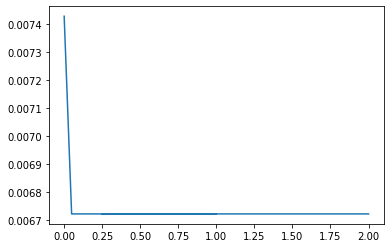

In [180]:
f1_lasso_mses= []
for c in c_values:
    f1_lasso_pipe = make_pipeline(Lasso(alpha=c))
    f1_lasso_pipe.fit(x_train, yf_train)
    f1_lasso_prediction = f1_lasso_pipe.predict(x_test)
    f1_lasso_mse = np.square(np.subtract(f1_lasso_prediction,yf_test)).mean()
    f1_lasso_mses.append(f1_lasso_mse)
    print('Classifer: LASSO')
    print('Hyperparamater: Alpha = ', c)
    print('Mean Square Error:', f1_lasso_mse)
plt.plot(c_values, f1_lasso_mses)

Classifer: Ridge
Hyperparamater: Alpha =  0.001
Mean Square Error: 0.007816646405102181
Classifer: Ridge
Hyperparamater: Alpha =  0.001
Mean Square Error: 0.007816646405102181
Classifer: Ridge
Hyperparamater: Alpha =  0.05
Mean Square Error: 0.007816558151969298
Classifer: Ridge
Hyperparamater: Alpha =  0.1
Mean Square Error: 0.007816467539409797
Classifer: Ridge
Hyperparamater: Alpha =  1.0
Mean Square Error: 0.007814762721122893
Classifer: Ridge
Hyperparamater: Alpha =  0.25
Mean Square Error: 0.007816192552805348
Classifer: Ridge
Hyperparamater: Alpha =  0.5
Mean Square Error: 0.007815724995884532
Classifer: Ridge
Hyperparamater: Alpha =  1
Mean Square Error: 0.007814762721122893
Classifer: Ridge
Hyperparamater: Alpha =  2
Mean Square Error: 0.007812768632500869


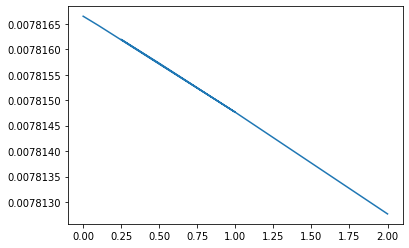

In [181]:
f1_ridge_mses= []
for c in c_values:
    f1_ridge_pipe = make_pipeline(Ridge(alpha=c))
    f1_ridge_pipe.fit(x_train, yf_train)
    f1_ridge_prediction = f1_ridge_pipe.predict(x_test)
    f1_ridge_mse = np.square(np.subtract(f1_ridge_prediction,yf_test)).mean()
    f1_ridge_mses.append(f1_ridge_mse)
    print('Classifer: Ridge')
    print('Hyperparamater: Alpha = ', c)
    print('Mean Square Error:', f1_ridge_mse)
plt.plot(c_values, f1_ridge_mses)

In [183]:
f1_kernel_mses= []
for ker in kernels:
    f1_svr = make_pipeline(SVR(kernel=ker))
    f1_svr.fit(x_train, yf_train)
    f1_svr_prediction = f1_svr.predict(x_test)
    f1_kernel_mse = np.square(np.subtract(f1_svr_prediction,yf_test)).mean()
    kernel_mses.append(f1_kernel_mse)
    print('Classifer: SVR')
    print('Hyperparamater: Kernel = ', ker)
    print('Mean Square Error:', f1_kernel_mse)

Classifer: SVR
Hyperparamater: Kernel =  linear
Mean Square Error: 0.0070298167650926285
Classifer: SVR
Hyperparamater: Kernel =  poly
Mean Square Error: 0.01013811341407209
Classifer: SVR
Hyperparamater: Kernel =  rbf
Mean Square Error: 0.007121857324978603
Classifer: SVR
Hyperparamater: Kernel =  sigmoid
Mean Square Error: 113.98382544373035


In [185]:
scores = cross_val_score(Lasso(alpha=0.05), x_data, yf1_data, cv=5, scoring='neg_mean_squared_error')
for i, score in enumerate(scores):
    print('Crossfold ', i, ':', -1*score)
print('Average Error:', -1*np.mean(scores))
print('Standard Deviation of Error:', np.std(scores))

Crossfold  0 : 0.008027377522791356
Crossfold  1 : 0.009375627713437534
Crossfold  2 : 0.011451330208231436
Crossfold  3 : 0.0079217205621545
Crossfold  4 : 0.004285376287350277
Average Error: 0.00821228645879302
Standard Deviation of Error: 0.0023402568506476823


In [186]:
scores = cross_val_score(SVR(kernel='linear'), x_data, yf1_data, cv=5, scoring='neg_mean_squared_error')
for i, score in enumerate(scores):
    print('Crossfold ', i, ':', -1*score)
print('Average Error:', -1*np.mean(scores))
print('Standard Deviation of Error:', np.std(scores))

Crossfold  0 : 0.009058618659316963
Crossfold  1 : 0.010017414830785911
Crossfold  2 : 0.011460147374939672
Crossfold  3 : 0.00890066510158563
Crossfold  4 : 0.004290907267021537
Average Error: 0.008745550646729943
Standard Deviation of Error: 0.00240634966762861


### Results: It looks like Lasso(alpha=.05) is the best regressive model for the f1 returns. It performed best of the different linear regression models I tested and did better than the best SVR model in terms of cross validation score mean.

# Saving the Model

After all of the data cleaning, standardizing, and modeling, it is time to pickle these models so that way we can use them in future testing. I have fitted the models using all of the data and saved them under the models folder.

In [189]:
import pickle
final_monthly_return_model = SVR(kernel='linear')
final_monthly_return_model.fit(x_data, y_data)
pickle.dump(final_monthly_return_model, open('model/final_monthly_return_model.sav', 'wb'))

final_monthly_return_f1_model = Lasso(alpha=0.05)
final_monthly_return_f1_model.fit(x_data, yf1_data)
pickle.dump(final_monthly_return_f1_model, open('model/final_monthly_return_f1_model.sav', 'wb'))